#### 버전문제로 실행이 안되어 버전 변경 필요
- pip install opencv-python==3.4.2.16
- pip install opencv-contrib-python==3.4.2.16

두가지 명령어를 각각 수행

In [ ]:
import cv2
print(cv2.__version__)

#### 이전코드 오류해결
- contours, _ = cv2.findContours(th, cv2.RETR_EXTERNAL,  cv2.CHAIN_APPROX_SIMPLE) [opencv 4]
-   _ , contours, _ = cv2.findContours(th, cv2.RETR_EXTERNAL,  cv2.CHAIN_APPROX_SIMPLE) [opencv 3]

### 도형검출
    - 코드 전체적인 설명 필요 
    - approx 인덱싱, 그려지는 것 설명 필요
    - 입실론이 달라질 때 꼭지점 개수 적어지는 것 설명하기
    - tri.jpg 이미지 제공하기

In [ ]:
import cv2

img_color = cv2.imread("img/tri.jpg", cv2.IMREAD_COLOR)
cv2.imshow('result', img_color)
cv2.waitKey(0)

img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
cv2.imshow('result', img_gray)
cv2.waitKey(0)

ret,img_binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
cv2.imshow('result', img_binary)
cv2.waitKey(0)

_, contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


for cnt in contours:
    size = len(cnt)
    print(size)

    epsilon = 0.005 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)

    size = len(approx)
    print(size)

    #cv2.approxPolyDP결과로 출력되는 좌표 선하나씩 출력해보기
    cv2.line(img_color, tuple(approx[0][0]), tuple(approx[1][0]), (0, 255, 0), 3)
    print(approx[0][0])
    print(approx[1][0])
    cv2.imshow('result', img_color)
    cv2.waitKey(0)
    
    cv2.line(img_color, tuple(approx[1][0]), tuple(approx[2][0]), (0, 255, 0), 3)
    print(approx[1][0])
    print(approx[2][0])
    cv2.imshow('result', img_color)
    cv2.waitKey(0)
    
    
    cv2.line(img_color, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)
    print(approx[0][0])
    print(approx[2][0])
    cv2.putText(img_color, str(size), (30,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 3, 8)
    cv2.imshow('result', img_color)
    cv2.waitKey(0)
    
    #궁금하니까 출력해보기 
print(approx[:,:,:])
   

# 일반화    
#     cv2.line(img_color, tuple(approx[0][0]), tuple(approx[size-1][0]), (0, 255, 0), 3)
#     for k in range(size-1):
#         cv2.line(img_color, tuple(approx[k][0]), tuple(approx[k+1][0]), (0, 255, 0), 3)
    
cv2.waitKey(0)
cv2.destroyAllWindows()

### 예제

In [ ]:
import cv2
import numpy as np

# 이미지를 읽어서 그레이 스케일 및 스레시홀드 변환
img = cv2.imread("img/5shapes.jpg")

imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

# 컨투어 찾기
_, contours, _ = cv2.findContours(th, cv2.RETR_EXTERNAL,  cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    # 각 컨투어에 근사 컨투어로 단순화 
    approx = cv2.approxPolyDP(contour, 0.01*cv2.arcLength(contour, True), True)
    # 꼭지점의 갯수
    vertices = len(approx)
    print("vertices:", vertices)
    
    # 중심점 찾기
    mmt = cv2.moments(contour)
    cx,cy = int(mmt['m10']/mmt['m00']), int(mmt['m01']/mmt['m00'])
    
    name = "Unkown"
    if vertices == 3: # 꼭지점이 3개는 삼각형
        name = "Triangle"
        color = (0,255,0)
    elif vertices == 4: # 꼭지점 4개는 사각형
        x,y,w,h = cv2.boundingRect(contour)
        if abs(w-h) <= 3:   # 폭과 높이의 차이가 3보다 작으면 정사각형
            name = 'Square'
            color = (0,125,255)
        else:               # 폭과 높이 차이가 3보다 크면 직사각형
            name = 'Rectangle'
            color = (0,0,255)
    elif vertices == 10:  # 꼭 지점 갯수 10개는 별 
        name = 'Star'
        color = (255,255,0)
    elif vertices >= 15: # 꼭 지점 10개 이상이면 원
        name = 'Circle'
        color = (0,255,255)
    # 컨투어 그리기    
    cv2.drawContours(img, [contour], -1, color, -1)
    # 도형 이름 출력
    cv2.putText(img, name, (cx-50, cy), cv2.FONT_HERSHEY_COMPLEX_SMALL,1, (100,100,100), 1)

cv2.imshow('Input Shapes', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

vertices: 10
vertices: 16
vertices: 3
vertices: 4
vertices: 4


### 문서 스캐너 구현 

### 문서 스캐너 구현 
Q. 좌표를 찍어주지 않아도 자동으로 스캔 효과를 내는 프로그램 작성

####  Hint
    - (1) 그레이 스케일 -> 가우시안블로로 노이즈 제거 -> 케니 엣지로 경계 검출
    - (2) 경계검출한 이미지에서 컨투어를 찾아 가장 큰 컨투어를 골라 approxPolyDP()  함수로 단순화한 뒤에  꼭지점 4개를 구한다. 
    - (3) approPolyDP()의 결과값에서 4 x 2 배열로 resape해서 크기를 조정한다. 

In [5]:
import cv2
import numpy as np

win_name = 'scan'
# 이미지 읽기
img = cv2.imread("img/paper.jpg")
cv2.imshow('original', img)
cv2.waitKey(0)
draw = img.copy()

# 그레이스 스케일 변환 및 케니 엣지
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0) # 가우시안 블러로 노이즈 제거
edged = cv2.Canny(gray, 75, 200)    # 케니 엣지로 경계 검출
cv2.imshow(win_name, edged)
cv2.waitKey(0)

# 컨투어 찾기
(_, cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
# 모든 컨투어 그리기
cv2.drawContours(draw, cnts, -1, (0,255,0))
cv2.imshow(win_name, draw)
cv2.waitKey(0)


# 컨투어들 중에 영역 크기 순으로 정렬
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]
for c in cnts:
    # 영역이 가장 큰 컨투어 부터 근사 컨투어 단순화
    peri = cv2.arcLength(c, True)   # 둘레 길이
    # 둘레 길이의 0.02 근사값으로 근사화
    vertices = cv2.approxPolyDP(c, 0.02 * peri, True) 
    if len(vertices) == 4: # 근사한 꼭지점이 4개면 중지
        break
pts = vertices.reshape(4, 2) # N x 1 x 2 배열을 4 x 2크기로 조정
for x,y in pts:
    cv2.circle(draw, (x,y), 10, (0,255,0), -1) # 좌표에 초록색 동그라미 표시
cv2.imshow(win_name, draw)
cv2.waitKey(0)


# 좌표 4개 중 상하좌우 찾기 ---② 
sm = pts.sum(axis=1)                 # 4쌍의 좌표 각각 x+y 계산
diff = np.diff(pts, axis = 1)       # 4쌍의 좌표 각각 x-y 계산

topLeft = pts[np.argmin(sm)]         # x+y가 가장 값이 좌상단 좌표
bottomRight = pts[np.argmax(sm)]     # x+y가 가장 큰 값이 좌상단 좌표
topRight = pts[np.argmin(diff)]     # x-y가 가장 작은 것이 우상단 좌표
bottomLeft = pts[np.argmax(diff)]   # x-y가 가장 큰 값이 좌하단 좌표

# 변환 전 4개 좌표 
pts1 = np.float32([topLeft, topRight, bottomRight , bottomLeft])

# 변환 후 영상에 사용할 서류의 폭과 높이 계산 ---③ 
w1 = abs(bottomRight[0] - bottomLeft[0])    # 상단 좌우 좌표간의 거리
w2 = abs(topRight[0] - topLeft[0])          # 하당 좌우 좌표간의 거리
h1 = abs(topRight[1] - bottomRight[1])      # 우측 상하 좌표간의 거리
h2 = abs(topLeft[1] - bottomLeft[1])        # 좌측 상하 좌표간의 거리
width = max([w1, w2])                       # 두 좌우 거리간의 최대값이 서류의 폭
height = max([h1, h2])                      # 두 상하 거리간의 최대값이 서류의 높이

# 변환 후 4개 좌표
pts2 = np.float32([[0,0], [width-1,0], 
                    [width-1,height-1], [0,height-1]])

# 변환 행렬 계산 
mtrx = cv2.getPerspectiveTransform(pts1, pts2)
# 원근 변환 적용
result = cv2.warpPerspective(img, mtrx, (width, height))
cv2.imshow(win_name, result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 영상 매칭과 추적

### 평균 해시 매칭 
: 픽셀 전체의 평균 값을 구해서 각 픽셀의 값이 평균보다 작으면 0, 크면 1로 바꿉니다. 

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1]
 [1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1]]


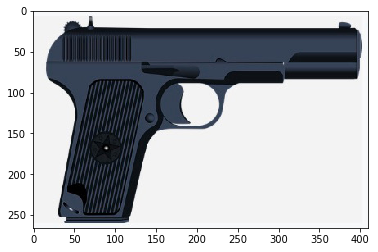

In [2]:
import cv2
from matplotlib import pyplot as plt

#영상 읽어서 그레이 스케일로 변환
img = cv2.imread('img/pistol.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 16x16 크기로 축소 ---①
gray = cv2.resize(gray, (16,16))
# 영상의 평균값 구하기 ---②
avg = gray.mean()
# 평균값을 기준으로 0과 1로 변환 ---③
bin = 1 * (gray > avg)
print(bin)


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### 유사도 측정방법
    (1) 유클리드 거리 : 두 값의 차이 (높은 자리가 다를 수록 더 큰거리)
    (2) 해밍거리 : 길이가 같을 때 자리 값이 서로 다른 것이 몇개인지 ( 각 자리수의 차이의 개수 비교 )
        ex) 12345와 123(54)가 있을 때 해밍 거리가 '2'

http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz

    - 링크 다운로드 후 
    - img/''/ (이미지(ig)파일 안에 위치시키기) --- (1) 경로와 동일하게

### 문서 스캐너 구현 
Q. 좌표를 찍어주지 않아도 자동으로 스캔 효과를 내는 프로그램 작성

####  Hint
    - (1) 그레이 스케일 -> 가우시안블로로 노이즈 제거 -> 케니 엣지로 경계 검출
    - (2) 경계검출한 이미지에서 컨투어를 찾아 가장 큰 컨투어를 골라 approxPolyDP()  함수로 단순화한 뒤에  꼭지점 4개를 구한다. 
    - (3) approPolyDP()의 결과값에서 4 x 2 배열로 resape해서 크기를 조정한다. 

In [1]:
import cv2
import numpy as np
import glob

# 영상 읽기 및 표시
img = cv2.imread('img/pistol.jpg')
cv2.imshow('query', img)

# 비교할 영상들이 있는 경로 ---①
search_dir = 'img/101_ObjectCategories'

# 이미지를 16x16 크기의 평균 해쉬로 변환 ---②
def img2hash(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (16, 16))
    avg = gray.mean()
    bi = 1 * (gray > avg)
    return bi

# 해밍거리 측정 함수 ---③
def hamming_distance(a, b):
    a = a.reshape(1,-1) # "-1" 자동으로 차원선정
    b = b.reshape(1,-1)
    # 같은 자리의 값이 서로 다른 것들의 합
    distance = (a !=b).sum()
    return distance

# 권총 영상의 해쉬 구하기 ---④
query_hash = img2hash(img)

# 이미지 데이타 셋 디렉토리의 모든 영상 파일 경로 ---⑤
img_path = glob.glob(search_dir+'/**/*.jpg')
for path in img_path:
    # 데이타 셋 영상 한개 읽어서 표시 ---⑥
    img = cv2.imread(path)
    cv2.imshow('searching...', img)
    cv2.waitKey(5)
    # 데이타 셋 영상 한개의 해시  ---⑦
    a_hash = img2hash(img)
    # 해밍 거리 산출 ---⑧
    dst = hamming_distance(query_hash, a_hash)
    if dst/256 < 0.25: # 해밍거리 25% 이내만 출력 ---⑨
        print(path, dst/256)
        cv2.imshow(path, img)
cv2.destroyWindow('searching...')
cv2.waitKey(0)
cv2.destroyAllWindows()

img/101_ObjectCategories\BACKGROUND_Google\image_0398.jpg 0.234375
img/101_ObjectCategories\binocular\image_0011.jpg 0.23828125
img/101_ObjectCategories\Faces_easy\image_0419.jpg 0.2421875
img/101_ObjectCategories\revolver\image_0001.jpg 0.2421875
img/101_ObjectCategories\revolver\image_0015.jpg 0.24609375
img/101_ObjectCategories\revolver\image_0017.jpg 0.23828125
img/101_ObjectCategories\revolver\image_0018.jpg 0.1953125
img/101_ObjectCategories\revolver\image_0019.jpg 0.23828125
img/101_ObjectCategories\revolver\image_0021.jpg 0.171875
img/101_ObjectCategories\revolver\image_0022.jpg 0.21484375
img/101_ObjectCategories\revolver\image_0023.jpg 0.21875
img/101_ObjectCategories\revolver\image_0031.jpg 0.21875
img/101_ObjectCategories\revolver\image_0033.jpg 0.2421875
img/101_ObjectCategories\revolver\image_0034.jpg 0.23046875
img/101_ObjectCategories\revolver\image_0037.jpg 0.2421875
img/101_ObjectCategories\revolver\image_0064.jpg 0.18359375
img/101_ObjectCategories\revolver\image_006

### 템플릿을 이용한 객체검출

* result = cv.matchTemplate(img, temp, method)
    - img : 입력영상
    - temp : 템플릿 영상
    - method : 매칭 메서드(SQDIFF를 제외하고는 높을 수록 좋은 매칭)
        - cv2.TM_SQDIFF : 제곱 차이 매칭 ( 낮을 수록 좋은 매칭 )
        - cv2.TM_SQDIFF_NORMED : 제곱 차이 정규화 (낮을 수록 좋은 매칭 )
        - cv2.TM_CCORR : 상관관계 매칭 (0 ~ )
        - cv2.TM_CCORR_NORMED : 상관관계 매칭의 정규화
        - cv2.TM_CCOEFF (-1 ~ 1 )
    - result : 매칭 결과(2차원 배열)
    
* minVal, maxVal, minLoc, maxLoc, MaxLoc = cv2.minMaxLoc(src) 
: 매칭 결과를 바탕으로 결과값이 출력
    - src : 입력
    - minVal, maxVal(최대, 최소)
    - minLoc, maxLoc (최소 값과 최대 값의 좌표)        

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt # -- for mac

# 입력이미지와 템플릿 이미지 읽기
img = cv2.imread('img/figures.jpg')
template = cv2.imread('img/taekwonv1.jpg')
th, tw = template.shape[:2]
cv2.imshow('template', template)

# 3가지 매칭 메서드 순회
methods = ['cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR_NORMED', \
                                     'cv2.TM_SQDIFF_NORMED']
for i, method_name in enumerate(methods):
    img_draw = img.copy()
    method = eval(method_name)
    # 템플릿 매칭   ---①
    res = cv2.matchTemplate(img, template, method)

    # 최대, 최소값과 그 좌표 구하기 ---②
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print(method_name, min_val, max_val, min_loc, max_loc)

    # TM_SQDIFF의 경우 최소값이 좋은 매칭, 나머지는 그 반대 ---③
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
        match_val = min_val
    else:
        top_left = max_loc
        match_val = max_val
    # 매칭 좌표 구해서 사각형 표시   ---④      
    bottom_right = (top_left[0] + tw, top_left[1] + th)
    cv2.rectangle(img_draw, top_left, bottom_right, (0,0,255),2)
    # 매칭 포인트 표시 ---⑤
    cv2.putText(img_draw, str(match_val), top_left, \
                cv2.FONT_HERSHEY_PLAIN, 2,(0,255,0), 1, cv2.LINE_AA)
    #plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)) #-- for Mac
    #plt.show()  #-- for Mac
    cv2.imshow(method_name, img_draw)
cv2.waitKey(0)
cv2.destroyAllWindows() 

cv2.TM_CCOEFF_NORMED -0.1780252307653427 0.5131933093070984 (42, 0) (208, 43)
cv2.TM_CCORR_NORMED 0.827332615852356 0.9238022565841675 (85, 6) (208, 43)
cv2.TM_SQDIFF_NORMED 0.17028295993804932 0.36860838532447815 (208, 43) (86, 7)


## 영상의 특징과 키 포인트 

### 코너 특징 검출

#### 해리스 코너 검출 
: 소벨 미분으로 엣지를 검출하여, 엣지의 경사도 변화량을 측정하여 변화량이 X,Y축 크게 변화하는 것을 코너로 판단
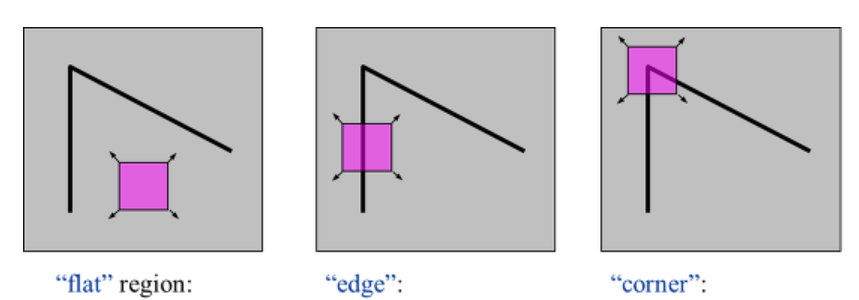

* dst = cv.cornerHarris(src, blockSize, ksize, k)
    - src : 입력 영상, 그레이 스케일 
    - blockSize : 이웃 픽셀 범위
    - ksize : 소벨 미분 커널 크기
    - k : 코너 검출 상수 (0.04 ~ 0.06)
    - dst : 코너 검출 결과 (변화량의 값)

In [1]:
import cv2
import numpy as np

img = cv2.imread('img/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 해리스 코너 검출 ---①
corner = cv2.cornerHarris(gray, 2, 3, 0.04) # 값 변경해보기
# 변화량 결과의 최대값 10% 이상의 좌표 구하기 ---②
coord = np.where(corner > 0.1 * corner.max()) #np.where 원하는 원소의 index 출력
coord = np.stack((coord[1], coord[0]), axis=-1)

# 코너 좌표에 동그리미 그리기 ---③
for x, y in coord:
    cv2.circle(img, (x,y), 5, (0,0,255), 1, cv2.LINE_AA)

# 변화량을 영상으로 표현하기 위해서 0~255로 정규화 ---④
corner_norm = cv2.normalize(corner, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
# 화면에 출력
corner_norm = cv2.cvtColor(corner_norm, cv2.COLOR_GRAY2BGR)
merged = np.hstack((corner_norm, img))

# plt.imshow(cv2.cvtColor(merged, cv2.COLOR_BGR2RGB)) #-- for Mac
# plt.show()  #-- for Mac
cv2.imshow('Harris Corner', merged)
cv2.waitKey()
cv2.destroyAllWindows()

#### 시-토마시 코너 검출

* coners = cv2.goodFeaturesToTrack(img, maxCorners, qualitLevel, minDistance)
    - img : 입력 영상
    - maxCorners : 얻고 싶은 코너 개수 (강한 순)
    - qualityLevel : 코너로 판단할 스레시 홀드 값
    - minDistance : 코너간 최소거리 
    - cornes : 코너 검출 좌표 결과 (실수 값으로 정수로 변형 필요)

In [ ]:
import cv2
import numpy as np

img = cv2.imread('img/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 시-토마스의 코너 검출 메서드
corners = cv2.goodFeaturesToTrack(gray, 80, 0.01, 10)
# 실수 좌표를 정수 좌표로 변환
corners = np.int32(corners)

# 좌표에 동그라미 표시
for corner in corners:
    x, y = corner[0]
    cv2.circle(img, (x, y), 5, (0,0,255), 1, cv2.LINE_AA)

# plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB)) #-- for Mac
# plt.show()  #-- for Mac    
cv2.imshow('Corners', img)
cv2.waitKey()
cv2.destroyAllWindows()

## 키 포인트와 특징 검출기

* keypoints = detector.detect(img) : 키 포인트 검출 함수 
    - img : 입력 영상, 바이너리 스케일
    - keypoints : 특징점 검출 결과 (리스트)
  
  
* KeyPoint : 특징점 정보를 담는 객체 
    - pt : 키 포인트 좌표 ( float 타입으로 정수로 변환 필요)
    - size : 의미있는 키포인트 이웃의 반지름
    - angle : 특징점 방향 (시계방향, -1 = 의미없음)
    - response : 특징점 반응 강도(추출기에 따라 상이)
    - octave : 발견된 이미지 피라미드 계층
    - class_id : 키 포인트가 속한 객체 ID
      
          
* outImg = cv2.drawKeypoints(img, keypoints, outImg[,color[,flags]]) : 검출 포인트를 표시 
    - img : 입력이미지
    - keypoints : 표시할 키 포인트 리스트
    - outImg : 키 포인트가 그려진 결과 이미지
    - color : 표시할 색상(기본값 랜덤)
    - flags : 표시 방법 선택 플래그 
        - cv2.DRAW_MATCHES_FLAGS_DEFAULT : 좌표 중심에 동그라미만 그림
        - CV2.DRAW_MATCHS_FLAGS_DRAW_RICH_KEYPOINTS : 동그라미의 크기를 size와 angle 반영

### GFTTDetector
: cv2.goodFeaturesToTrack(시-토마시 코너검출)로 구현된 검출기입니다.
* detector = cv2.GFTTDetector_create

In [ ]:
import cv2
import numpy as np
 
img = cv2.imread("img/house.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Good feature to trac 검출기 생성 ---①
gftt = cv2.GFTTDetector_create() 
# 키 포인트 검출 ---②
keypoints = gftt.detect(gray, None)
# 키 포인트 그리기 ---③
img_draw = cv2.drawKeypoints(img, keypoints, None)

# 결과 출력 ---④
# plt.imshow(cv2.cvtColor(img_draw , cv2.COLOR_BGR2RGB)) #-- for Mac
# plt.show()  #-- for Mac  
cv2.imshow('GFTTDectector', img_draw)
cv2.waitKey(0)
cv2.destroyAllWindows()

### FAST
: 엣지를 검출 하지 않고, 픽셀 중심으로 원을 그려 임계값 기준으로 밝거나 어두운 것이 특정 개수 이상 연속되면 코너로 판단

* detector = cv2.FastFeatureDetector_create(threshold)
    - threshold : 코너 판단 임계값 

In [ ]:
import cv2
import numpy as np

img = cv2.imread('img/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# FASt 특징 검출기 생성 ---①
fast = cv2.FastFeatureDetector_create(50)
# 키 포인트 검출 ---②
keypoints = fast.detect(gray, None)
# 키 포인트 그리기 ---③
img = cv2.drawKeypoints(img, keypoints, None)
# 결과 출력 ---④
# plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB)) #-- for Mac
# plt.show()  #-- for Mac  
cv2.imshow('FAST', img)
cv2.waitKey()
cv2.destroyAllWindows()

### SimplBlobDetector
: 자잘한 객체는 노이즈로 판단하고 특정 크기 이상의 큰 객체에만 관심을 두는 방법
* dector = cv2.SimpleBlobDetector_create

In [ ]:
import cv2
import numpy as np
 
img = cv2.imread("img/house.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# SimpleBlobDetector 생성 ---①
detector = cv2.SimpleBlobDetector_create()
# 키 포인트 검출 ---②
keypoints = detector.detect(gray)
# 키 포인트를 빨간색으로 표시 ---③
img = cv2.drawKeypoints(img, keypoints, None, (0,0,255),\
                flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # 동그라미 크기를 사이즈와 angle 반영

# plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB)) #-- for Mac
# plt.show()  #-- for Mac  
cv2.imshow("Blob", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 디스크립터 추출기

* keypoints, descriptors = detector.detectAndCompute(image, mask[,descriptors, useProvidedKeypoints])
: 키 포인트 검출과 특징 디스크립터 계산을 한번에 수행
    - image : 입력 영상
    - keypoints : 디스크립터 계산을 위해 사용할 키 포인트
    - descriptors : 계산된 디스크립터 

### SIFT
* detector = cv2.xfeatures2d.SIFT_create()

In [3]:
import cv2
import numpy as np

img = cv2.imread('img/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# SIFT 추출기 생성
sift = cv2.xfeatures2d.SIFT_create()
# 키 포인트 검출과 서술자 계산
keypoints, descriptor = sift.detectAndCompute(gray, None)
print('keypoint:',len(keypoints), 'descriptor:', descriptor.shape)
print(descriptor)

# 키 포인트 그리기
img_draw = cv2.drawKeypoints(img, keypoints, None, \
                flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# 결과 출력
cv2.imshow('SIFT', img_draw)
cv2.waitKey()
cv2.destroyAllWindows()

keypoint: 413 descriptor: (413, 128)
[[  1.   1.   1. ...   0.   0.   1.]
 [  8.  24.   0. ...   1.   0.   4.]
 [  0.   0.   0. ...   0.   0.   2.]
 ...
 [  1.   8.  71. ...  73. 127.   3.]
 [ 35.   2.   7. ...   0.   0.   9.]
 [ 36.  34.   3. ...   0.   0.   1.]]


### SURF
* detector = cv2.xfeatures2d.SURF_create([hessianThreshold, n0ctaves, n0ctaveLayers, extended, upright])
    - hessianThreshold : 특징 추출 경계 값(100)
    - n0ctaves : 이미지 피라미드 계층 수 (3)

In [10]:
import cv2
import numpy as np

img = cv2.imread('img/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# SURF 추출기 생성 ( 경계:1000, 피라미드:3)
surf = cv2.xfeatures2d.SURF_create(1000, 3)
# 키 포인트 검출 및 서술자 계산
keypoints, desc = surf.detectAndCompute(gray, None)
print(desc.shape, desc)
# 키포인트 이미지에 그리기
img_draw = cv2.drawKeypoints(img, keypoints, None, \
                flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('SURF', img_draw)
cv2.waitKey()
cv2.destroyAllWindows()

(253, 64) [[-1.41381612e-03  1.54175982e-03  4.62181121e-03 ... -1.55561406e-03
   3.46733583e-03  3.80801107e-03]
 [ 2.16470612e-03 -4.75252513e-04  2.41602724e-03 ...  3.69785586e-04
   1.73354778e-03  9.68112552e-04]
 [ 4.88907890e-03 -5.32377686e-04  5.16193081e-03 ... -4.30460495e-04
   1.65855233e-03  8.13954917e-04]
 ...
 [ 3.04325600e-04  2.36827182e-05  1.86359545e-03 ... -5.30764228e-04
   1.12827413e-03  7.64863158e-04]
 [-1.12825415e-04  2.61629957e-05  2.42092094e-04 ... -5.81204367e-04
   1.18061574e-03  6.25324086e-04]
 [-1.16742598e-02 -1.76841277e-03  1.17120687e-02 ... -1.56724534e-04
   1.51467673e-03  3.98358854e-04]]


### ORB
: 방향과 회전을 고려한 알고리즘, 회전과 방향에 영향을 받지 않으며 속도가 빠름

* dectector = cv.ORB_create()

In [ ]:
import cv2
import numpy as np

img = cv2.imread('img/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ORB 추출기 생성
orb = cv2.ORB_create()
# 키 포인트 검출과 서술자 계산
keypoints, descriptor = orb.detectAndCompute(img, None)
# 키 포인트 그리기
img_draw = cv2.drawKeypoints(img, keypoints, None, \
             flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# 결과 출력
cv2.imshow('ORB', img_draw)
cv2.waitKey()
cv2.destroyAllWindows()

# Feature-based Cascade Classifiers
: 파일공유 필요
### (1) 검출할 대상이 되는 물체가 있는 이미지(Postive image)와 없는 이미지(Negative image)를 최대한 많이 활용해서 훈련시키는 기계학습 방식

    * 분류자(Classifier)를 훈련시키기 위해 매우 많은 훈련용 이미지가 필요하다. 
    * 특징(Features) 추출 필요
    
### (2)    
* 사람의 이미지 인식 과정 
  : 본다 -> 특징을 찾아낸다. -> 뇌에 저장된 정보를 바탕으로 판단을 내린다. 

* 컴퓨터의 이미지 인식 과정 
  : 촬영한다 -> 특징을 찾아낸다. -> 미리 학습해놓은 데이터를 바탕으로 판단을 내린다.

* Harr Cascades는 특징을 찾는 수많은 기법 중 하나 

### (3) 
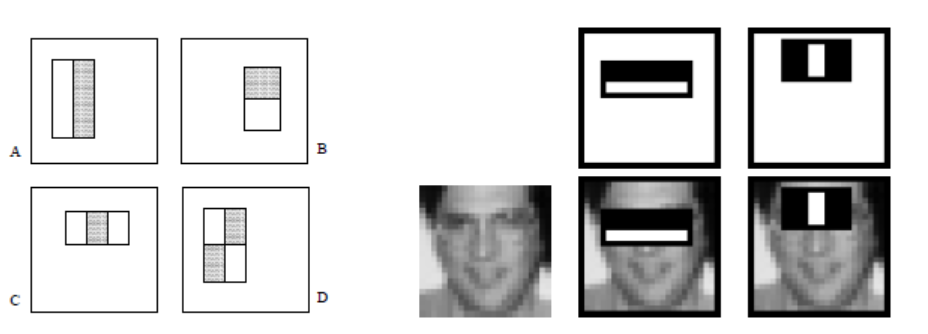
* 사람의 얼굴에는 부위별로 생기는 명암차이의 패턴을 구한다. 
* 사람의 얼굴에서 눈코입 위치는 크게 차이가 없으므로, 분포에 따른 명암 차이도 크지 않을 것\
* 밝은영역 – 어두운 영역 < 경계값(threshold) => 얼굴로 판단



### Harr Cascades를 이용한 얼굴 검출 CODE

* rects, weights = descriptor.detectMultiScale(img) : 객체 검출
    - img : 검출하고자 하는 이미지
    - rects : 검출된 결과 영역 좌표 N x 4(x, y, w, h)
    - weights : 검출된 결과 계수 N x 1

In [2]:
import matplotlib.pyplot as plt
import cv2

# 캐스케이드 파일 지정해서 검출기 생성하기 --- (*1)
cascade_file = "haarcascade_frontface.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어 들이고 그레이스케일로 변환하기 --- (*2)
img = cv2.imread("img/girl_face.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 인식하기 --- (*3)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
# 결과 확인하기 --- (*4)
if len(face_list) == 0:
    print("실패")
    quit()
# 인식한 부분 표시하기 --- (*5)
for (x,y,w,h) in face_list:
    print("얼굴의 좌표 =", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)

# 이미지 출력하기
cv2.imwrite("face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

얼굴의 좌표 = 141 125 373 373


<Figure size 640x480 with 1 Axes>

#### 예제) cascade를 이용하여, 얼굴을 검출해서 자동으로 모자이크 처리하기 (사각형은 그릴필요없음)

[[156 198 289 289]]
156 198 289 289


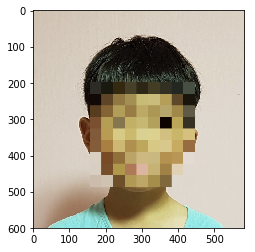

In [16]:
img = cv2.imread('img/boy_face.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cascade_file = "haarcascade_frontface.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 얼굴 인식하기 --- (*3)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))

mosaic_rate = 30
print(face_list)

color = (0, 0, 255)
for (x,y,w,h) in face_list:
    print(x,y,w,h)
    # 얼굴 부분 자르기 --- (※5)
    face_img = img[y:y+h, x:x+w]
    # 자른 이미지를 지정한 배율로 확대/축소하기 --- (※6)
    face_img = cv2.resize(face_img, (w//mosaic_rate, h//mosaic_rate))
    # 확대/축소한 그림을 원래 크기로 돌리기 --- (※7)
    face_img = cv2.resize(face_img, (w, h), 
        interpolation=cv2.INTER_AREA)
    # 원래 이미지에 붙이기 --- (※8)
    img[y:y+h, x:x+w] = face_img
# 렌더링 결과를 파일에 출력
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
# cv2.imwrite('mosaiced.jpg', img)